### Introduction/Background ###
Poverty is one of the greatest concerns that the United States is currently faced with. This issue is often defined as a household or community lacking the necessary finances, resources, or even shelter. However, there are many underlying factors that add further complexity to the topic at hand. With this project, we aimed to distinguish the ethnic and social groups that are below the poverty line in each of our home states over time, California and Minnesota. The motivation of this paper and data stems from our own communities, backgrounds, and experiences as children. Our asperities and empirical accounts in underprivileged communities inspired us to analyze this data from an objective, wide-scale perspective. 

With the definition of poverty often varying from person to person, we will be following the U. S Census Bureau’s measurement of poverty which establishes a threshold using household income through earnings, child support, educational assistance, and others. In the table below, the thresholds are the same throughout the United States but the measurement of needs varies depending on the family’s size and the age of their members. Additionally, to help understand the history of poverty measures, further information can be found on the Census Bureau’s website. 

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(gridExtra)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)


ca = filter(county, state =="California")

# Selected variables to use for analysis
ca_poverty = select(ca, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')

# Loading 2016, 2017, 2019 poverty demographics dataset
# Each variable consists of deeper view of the demographics of the population experiencing poverty

demo2016 = read.table("2016_poverty_demographics.csv", sep = ",", header = TRUE)
demo2017 = read.table("2017_poverty_demographics.csv", sep = ",", header = TRUE)
demo2018 = read.table("2018_poverty_demographics.csv", sep = ",", header = TRUE)
demo2019 = read.table("2019_poverty_demographics.csv", sep = ",", header = TRUE)

ca_demo2016 = filter(demo2016, state == 'California')
ca_demo2017 = filter(demo2017, state == 'California')
ca_demo2018 = filter(demo2018, state == 'California')
ca_demo2019 = filter(demo2019, state == 'California')

#Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

#To remove scientific notation in graph 
options(scipen=10000)

# Filter state to Minnesota
minn = filter(county, state == 'Minnesota')

# Selected variables to use for analysis
minn_poverty = select(minn, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')
minn_poverty = arrange(minn_poverty, name)

# Shortened each county name
minn_poverty$names = c("Aitkin", "Anoka", "Becker", "Beltrami",
                      "Benton", "Big Stone", "Blue Earth", "Brown", 
                      "Carlton", "Carver", "Cass",
                      "Chippewa", "Chisago", "Clay", "Clearwater",
                      "Cook", "Cottonwood", "Crow Wing", "Dakota",
                      "Dodge", "Douglas", "Faribault", "Fillmore",
                      "Freeborn", "Goodhue", "Grant", "Hennepin",
                      "Houston", "Hubbard", "Isanti", "Itasca",
                      "Jackson", "Kanabec", "Kandiyohi", "Kittson",
                      "Koochiching"," Lac qui Parle", "Lake",
                      "Lake of the Woods", "Le Sueur", "Lincoln", "Lyon",
                      "Mahnomen", "Marshall",
                      "Martin", "McLeod", "Meeker", "Mille Lacs",
                      "Morrison", "Mower"," Murray", "Nicollet",
                      "Nobles", "Norman", "Olmsted", "Otter Tail",
                      "Pennington", "Pine", "Pipestone", "Polk", 
                      "Pope", "Ramsey", "Red Lake", "Redwood", 
                      "Renville", "Rice", "Rock", "Roseau",
                      "Scott", "Sherburne", "Sibley",
                      "St. Louis", "Stearns", "Steele", "Stevens",
                      "Swift", "Todd", "Traverse", 'Wabasha',
                      'Wadena', "Waseca", "Washington", "Watonwan",
                      "Wilkin", "Winona", "Wright", "Yellow Medicine")

# Updated NA values (this was pulled from the Census Bureau)
minn_poverty$poverty_under_18_2019 = c(18.0, 7.7, 15.8, 24.8, 11.3, 10.0, 11.8, 8.2, 12.0, 3.6,
                                 23.2, 9.0, 6.7, 13.7, 18.9, 15.6, 10.9, 14.7, 8.0, 5.0, 8.2, 16.8,
                                 17.5, 15.6, 13.3, 13.1, 13.3, 10.1, 17.0, 8.8, 15.9, 9.9, 11.7, 15.5,
                                 12.7, 19.2, 7.1, 12.1, 20.4, 12.8, 12.7, 18.4, 33.8, 7.6,
                                 18.9, 11.2, 7.1, 17.1, 10.8, 18.2, 7.4, 9.1, 19.2, 9.7, 10.4,
                                 11.4, 17.7, 12.7, 15.4, 18.0, 7.2, 20.6, 13.9, 13.2, 13.3, 13.3, 10.2,
                                 11.3, 7.3, 8.4, 10.5, 14.5, 16.8, 11.5, 6.1, 18.2, 16.8, 11.7, 8.5, 
                                 16.3, 10.0, 5.1, 20.8, 16.0, 10.1, 4.3, 12.3)

minn_poverty$poverty_2019 = c(12.2, 5.9, 11.0, 18.9, 10.3, 10.1, 17.6, 6.9, 11.3, 4.1, 13.6,
                                 9.3, 6.0, 12.3, 14.6, 12.6, 11.0, 10.8, 6.0, 5.1, 7.6, 11.5,
                                 10.7, 11.0, 9.3, 9.6, 10.4, 7.9, 11.8, 7.3, 12.2, 7.9, 10.0,
                                 10.5, 11.2, 13.6, 8.3, 8.7, 10.7, 8.5, 10.9, 14.1, 23.3, 6.9, 13.7,
                                 8.5, 6.7, 12.4, 10.2, 13.5, 7.1, 9.9, 13.6, 8.8, 8.4, 9.3, 11.0, 11.0, 11.7,
                                 11.8, 7.2, 14.0, 10.5, 10.1, 10.0, 9.2, 9.0, 8.1, 5.5, 6.4, 7.9, 14.1,
                                 12.9, 8.9, 12.4, 12.5, 11.9, 9.9, 7.7, 14.3, 9.7, 4.3, 13.4, 9.2, 12.9,
                                 4.6, 11.8)
#select(minn_poverty, 'name', 'poverty_under_18_2019', 'poverty_2019')

# Loading 2016, 2017, 2019 poverty demographics dataset
# Each variable consists of deeper view of the demographics of the population experiencing poverty

demo2016 = read.table("2016_poverty_demographics.csv", sep = ",", header = TRUE)
demo2017 = read.table("2017_poverty_demographics.csv", sep = ",", header = TRUE)
demo2018 = read.table("2018_poverty_demographics.csv", sep = ",", header = TRUE)
demo2019 = read.table("2019_poverty_demographics.csv", sep = ",", header = TRUE)

mdemo16 = filter(demo2016, state == 'Minnesota')
mdemo17 = filter(demo2017, state == 'Minnesota')
mdemo18 = filter(demo2018, state == 'Minnesota')
mdemo19 = filter(demo2019, state == 'Minnesota')

options(warn=-1)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
# Create a, b, c, d variables
fs = c("One person","Under age 65","Aged 65 and older","Two people",
                "Household under 65", "Household 65 and older", "Three people", 
                "Four people", "Five people", "Six people", "Seven People", "Eight people", 
                "Nine people and more ")
Avg16 = c(12228, 12486, 11511, 15569, 16151, 14522, 19105, 24563, 29111, 32928, 37458, 
          41781,49721)

Avg17 = c(12228, 12752, 11756, 15877, 16493,14828,19515,25094,29714,33618,38172,42648,50681)
Avg18 = c(12784, 13064, 12043, 16247,16889,15193,19985,25701,30459,34533,39194,43602, 51393)
Avg19 = c(13011, 13300,12261, 16521, 17196,15468,20335,26172,31021,35129,40016,44461,52875 )
# Join the variables to create a data frame
df <- data.frame(fs,Avg16,Avg17,Avg18, Avg19)
colnames(df) = c("Family Size", "Avg Threshold 2016", "Avg 2017", "Avg 2018", "Avg 2019")

name.width <- max(sapply(names(df), nchar))
names(df) <- format(names(df), width = name.width, justify = "centre")
format(df, width = name.width, justify = "centre")


Family Size,Avg Threshold 2016,Avg 2017,Avg 2018,Avg 2019
One person,12228,12228,12784,13011
Under age 65,12486,12752,13064,13300
Aged 65 and older,11511,11756,12043,12261
Two people,15569,15877,16247,16521
Household under 65,16151,16493,16889,17196
Household 65 and older,14522,14828,15193,15468
Three people,19105,19515,19985,20335
Four people,24563,25094,25701,26172
Five people,29111,29714,30459,31021
Six people,32928,33618,34533,35129


Our data were obtained from the U.S Census Bureau, the principal agency of the U.S Federal Statistical System which is responsible for producing data about the American people, and OpentIntro, a non-profit open-source organization that the American Institute of Mathematics has approved. OpenIntro consists of government sources from the Census Bureau to the Economic Research Service. We believe that the data that we used is observational since it has been collected to measure or survey income levels, the demographics, employment rates, etc. by county for each state. Furthermore, the observations and variables range from population size from 2000 to 2019 to county income levels and the percentage of ethnic groups in each county.  


### Method and Results ###

Following the collection process, most of the project was spent cleaning the data and deciding which variables to use before the analysis. This is because when the data was downloaded as a .xls file the format and structure of the data were not consistent so there were problems loading the files in R. The cleaning process consisted of merging datasets, fixing structural errors, removing irrelevant data, and amending variables in order to ensure the datasets are consistent with each other. During this process, there were inconsistencies in the U.S Consensus dataset from the years 2010 to 2015. Thus, it was decided to work with data from the following time period, 2016 to 2019. Nevertheless, there were missing values in the data set for 2016 to 2019. The U.S. consensus data set had values for all county populations, on the other hand, the yearly OpenIntro data set had the corresponding variables we wanted to use. To polish our datasets we worked with both the U.S Consensus and OpenIntro’s data set to calculate correct percentage values for citizens under a certain age, in a certain ethnic group, and with a particular education level.  

The analysis most appropriate to resolve what ethnic and social groups are under poverty was exploratory and time period analysis. Our goal in the analysis was to focus on the different types of population characteristics that are below the poverty line in California and Minnesota. Before discussing our results, we want to keep in mind when looking at the graphs, the population in California is vastly larger than in Minnesota. In the first section, we were interested in looking at income inequality in the most recent year in our data. This led to our curiosity about the percentage of people and children living below poverty throughout both states in 2019. In the next few sections, we will give an explanation on how we obtained our data, what calculations we applied to correctly get the percentage values for each county in California and Minnesota, and compare one another, and examine the difference. The following piece of information displays the different age groups living in poverty from 2016 to 2019. It is important to note this is different from the previous people under 18 living in poverty. The different age groups living in poverty are all accumulated and calculated under one total population. The next bit exhibits each ethnic group living in poverty from 2016 to 2019. The last segment presents the poverty rate for each household compared to the level of education. 

### Graphs for Median Household in 2019 ###

In [6]:
house = (select(minn, persons_per_household_2019))
#colMeans(house)

income = select(minn_poverty, median_household_income_2019)
#colMeans(income)

# Plot for Minnesota's Median Income by County
plot1 <- ggplot(minn_poverty, aes(minn_poverty$names, minn_poverty$median_household_income_2019
                                  ,color=minn_poverty$names)) + 
geom_point() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=25100 , linetype="dashed", color = "red") +
geom_hline(yintercept=61656, linetype="dashed", color = "blue") + 
xlab("County") + ylab("Minnesota's Median Income by County") + labs(color = "County") + 
ggtitle("Minnesota's Median Income by County (2019)")+ theme(legend.position = "none") +
scale_y_continuous(breaks=seq(0,120000,10000)); 



#To remove scientific notation 
options(scipen=10000)

house = select(ca, persons_per_household_2019)
houseBar = colMeans(house)
income = select(ca, median_household_income_2019)
inBar = colMeans(income);

povertLevel = 35000

ca$update = ca_demo2019$under_age_18_poverty/ca$pop_2019

caPov19 = select(ca, name, poverty_2019)


# Replacing the NA's to the mean of all the poverty levels under 18 in 2019  
caPov19$poverty_2019[is.na(caPov19$poverty_2019)] = 0
xbar = mean(caPov19$poverty_2019)
caPov19[caPov19 == 0] = xbar

#Plot median household income for 2019
plot4 <- ggplot(ca, aes(ca$name, ca$median_household_income_2019,color=ca$name)) + 
geom_point() + geom_hline(yintercept=povertLevel, linetype="dashed", color = "red") + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=inBar, linetype="dashed", color = "blue") + 
xlab("County") +
ylab("Median Household Income") + labs(color = "County") + 
ggtitle("California's Median Income by County (2019)")+ theme(legend.position = "none") +
scale_y_continuous(breaks=seq(0,120000,10000))


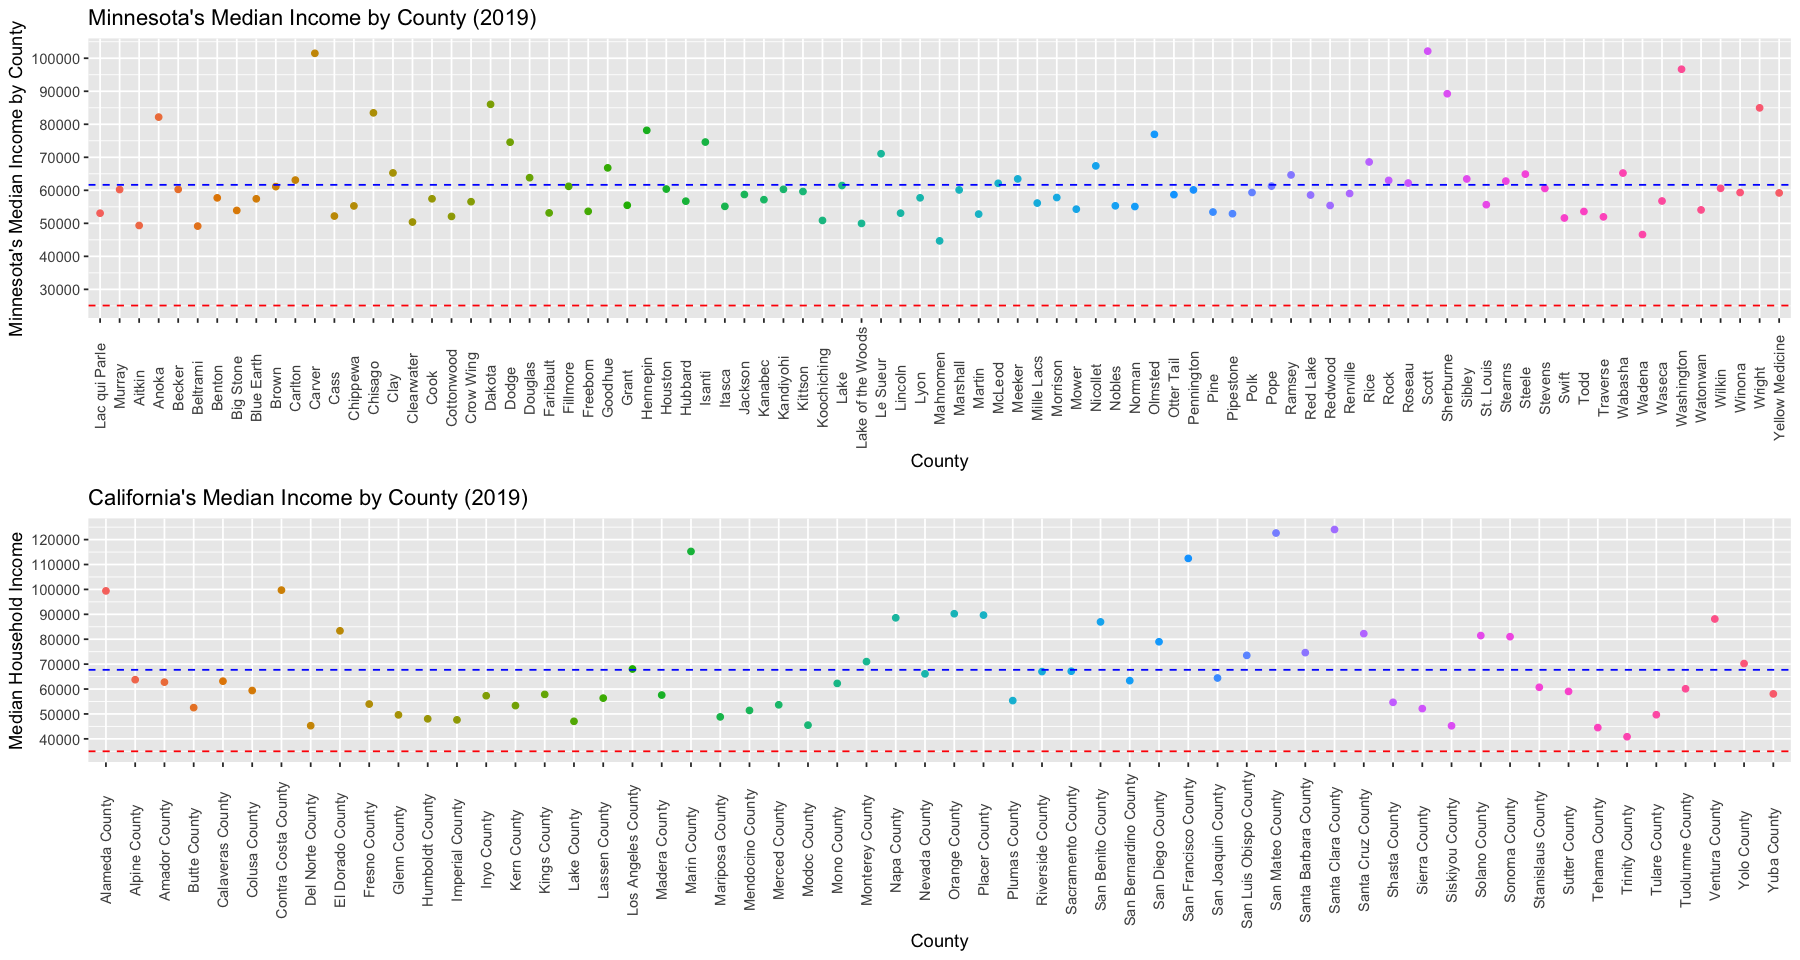

In [7]:
# Plotting all plots
grid.arrange(plot1, plot4, nrow=2)

The two graphs above show the median household income for each county in 2019. To achieve our results we gathered variables from the U.S. Consensus that held information on the median household income, the county, and the number of family members in each household. We defined our household size to be four. How we calculated the household size was by looking at the person per household variable in the U.S Consensus dataset and averaging them all. California’s and Minnesota’s household sizes had a small difference, however, the differences were not significant enough to decide a different household size for each state. We chose median household income to avoid any outliers that could possibly skew our data. The graphs above show each county’s median household income. The blue horizontal line represents the mean of the median household income in each corresponding state in California that was roughly  $\$67,713$ and for Minnesota, it was $\$61656$. The red horizontal line represents the threshold to be considered under poverty. 

Minnesota’s median household income is well above the threshold with Mahnomen county being closest to the threshold. That being said, Mahnomen’s population is small compared to Hennepin county which is one of the largest counties in Minnesota.

Looking at California, the median household income is relatively close to the poverty threshold. California has multiple counties near the threshold value with Trinity county being the closest. It can be argued that California’s median household income for each county is closer to the threshold because of population density. Nevertheless, the cost of living in California is very expensive. From our observed data, it seems that Minnesota has more people living above poverty than California, however, we do not have enough evidence to support that claim.  


### Percentage of People in Poverty ###

In [8]:
# Histogram of % of population that are in poverty (by county)
plot3 <- ggplot(minn_poverty, aes(x = minn_poverty$names, y = minn_poverty$poverty_2019,
                                 fill = '')) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("coral3")) + xlab("County") + 
    ylab("Percentage of People in Poverty") + 
    labs(fill = "%") + theme(legend.position = "none") +
    ggtitle("Minnesota's Percentage of People in Poverty (2019)") +
    scale_y_continuous(breaks=seq(0,100));

#Histogram of % of population that are in poverty (by county)
plot6 <- ggplot(caPov19, aes(caPov19$name, caPov19$poverty_2019,fill = '')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("darkorchid1")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("County") +
ylab("Percentage of People in Poverty") + labs(color = "County") + 
labs(fill = "%") + ggtitle("California's Percentage of People in Poverty (2019)") +
theme(legend.position = "none") +
scale_y_continuous(breaks=seq(0,120000,10000))



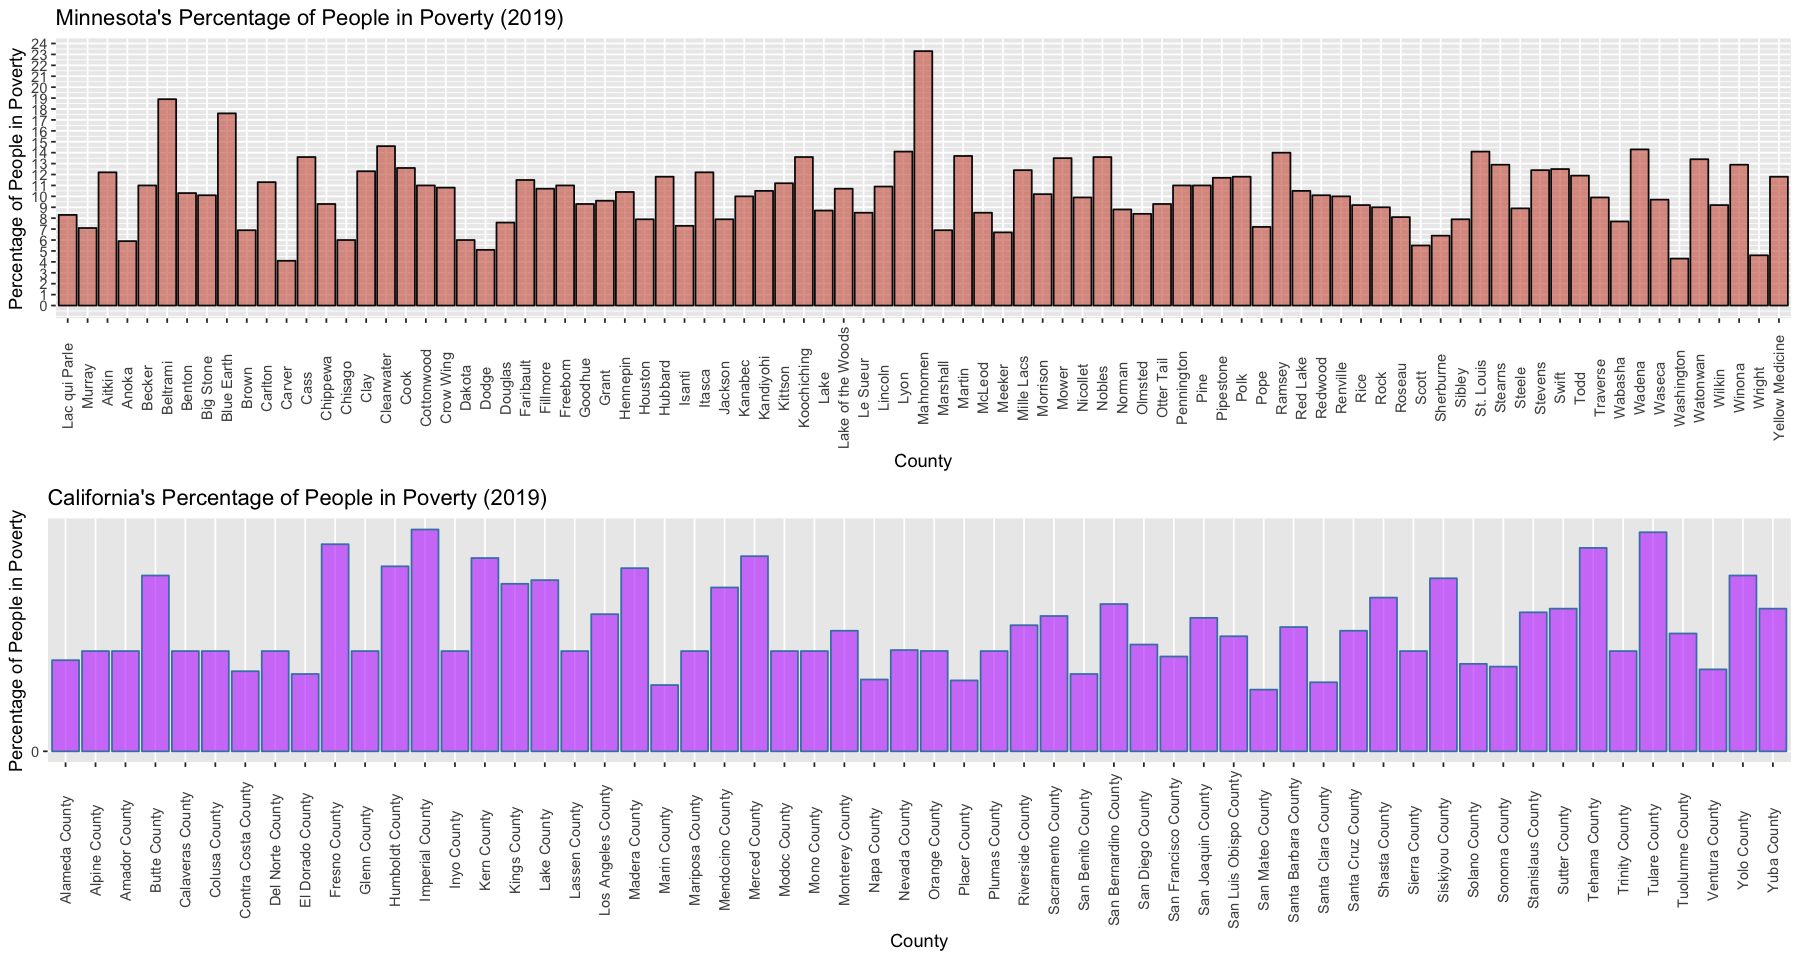

In [9]:
grid.arrange(plot3, plot6, nrow=2)

In the beginning, we were primarily interested in looking at the overall poverty rates between California and Minnesota, for which we obtained approximately $13.51\%$ and $9.67\%$ respectively. Furthermore, we wanted to take a closer look at the highest and lowest poverty rates by county. 

When looking at the graphs at glance, they tell us that the largest percentage of people living in poverty is roughly $24\%$ for Imperial, California, and Mahnomen, Minnesota. On the other hand, Carver, Minnesota, and San Mateo, California have the lowest rate of poverty. Here, we can see the large difference when comparing counties to the state-level poverty rate. As we mentioned earlier, we want to keep in mind that there is a large difference in populations between the two states and we want to note that each county is diverse regarding the size. In summary, the poverty rates in California are much higher than in Minnesota when we look at the side of the graph by side.

### Percentage Under 18 in Poverty ###

In [10]:
# Plot for Minnesota's % under 18 who are in poverty
plot2 <- ggplot(minn_poverty, aes(x = minn_poverty$names, y = minn_poverty$poverty_under_18_2019,
                                 fill = '')) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("County") + 
    ylab("Percentage of Poverty Under 18") + 
    labs(fill = "%") +
    ggtitle("Minnesota's Percentage Under 18 by County (2019)") + theme(legend.position = "none") +
    scale_y_continuous(breaks=seq(0,100));




#Plot 2019 for California's % under 18 in poverty 
plot5 <- ggplot(ca, aes(ca$name, caPov19$poverty_2019, fill='')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("#69b3a2")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("County") +
ylab("Percentage of Poverty Under 18") + labs(color = "County") + 
labs(fill = "%") + ggtitle("California's Percentage Under 18 by County (2019)")+
theme(legend.position = "none") +
scale_y_continuous(breaks=seq(0,100))

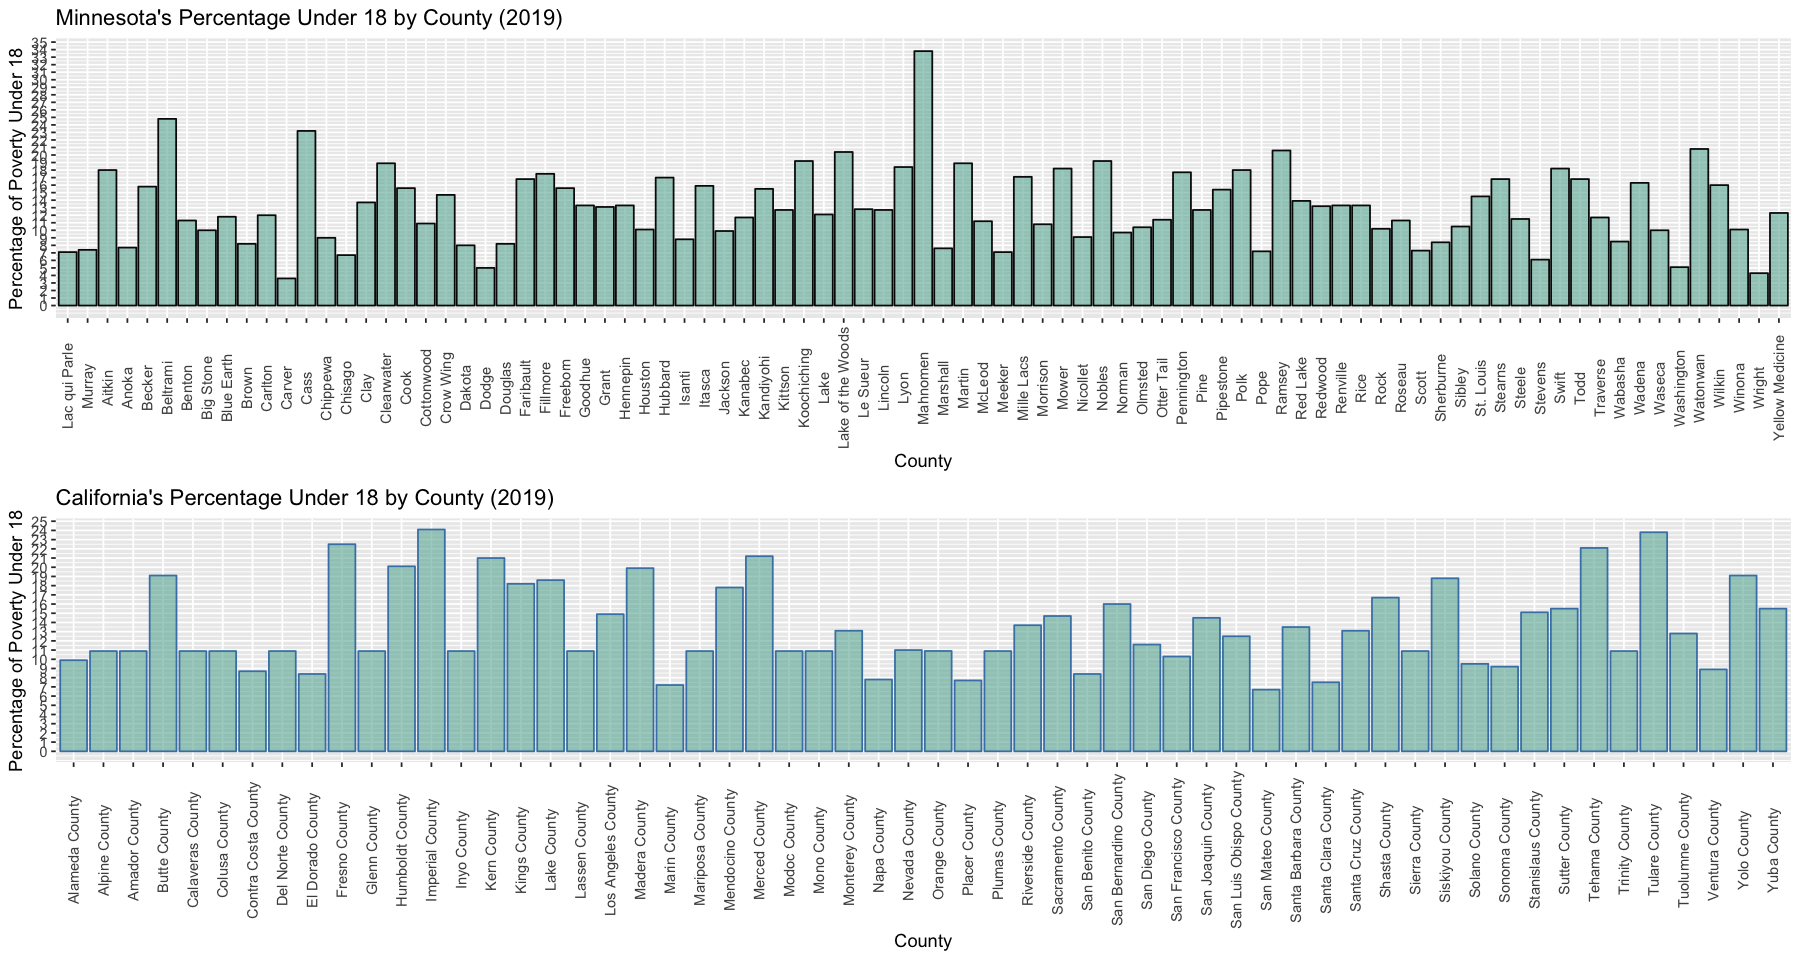

In [11]:
grid.arrange(plot2, plot5, nrow=2)

Section five represents the amount of people under $18$ in each county that live in poverty. The measurement of a person under $18$ living in poverty is different from an adult living in poverty. When observing a family of four one can be an adult and the rest children. Therefore, one adult's median income will place the children in poverty due to the fact that it is not a sufficient amount of money to support three kids. 

To obtain the above data we utilized poverty under $19$ in $2019$ variable in the U.S Consensus data set. Minnesota’s data set had all the required values to graph each county's percentage, however, California’s had missing values. To compensate for the missing percentages we calculated the mean of all counties percentages and replaced the missing values. 

Comparing both histograms we notice that Minnesota’s histogram fluctuates more than California’s. California does not fluctuate as much because of the amount of counties that had missing percentages. The mean percentage results in a more stable histogram. Regardless, California has a larger percentage of underage people living in poverty. 

### Different Age groups in poverty from 2016, 17, 18, 19 ###

In [15]:
# Age groups that are below poverty 2016, 2017, 2018, 2019
age16 = select(ca_demo2016, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age17 = select(ca_demo2017, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age18 = select(ca_demo2018, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age19 = select(ca_demo2019, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')

# Adjusting the Povert rate for different age groups
scale16 = age16 * ca$pop2016; 
scale17 = age17 * ca$pop2017; 
scale18 = age18 * ca_demo2018$pop2018; 
scale19 = age19 * ca$pop_2019; 

#Total Population for the whole state of each year
total_16 = sum(ca$pop2016); 
total_17 = sum(ca$pop2017); 
total_18 = sum(ca_demo2018$pop2018); 
total_19 = sum(ca$pop_2019); 

# Creating vectors for different ages of poverty, first, 
# taking the sum of each column.
# Then divide by the total population in order to obtain 
# the total % of the WHOLE state.

a1 = c(sum(scale16$under_age_18_poverty)/total_16, 
       sum(scale17$under_age_18_poverty)/total_17, 
        sum(scale18$under_age_18_poverty)/total_18,
       sum(scale19$under_age_18_poverty)/total_19); 

a2 = c(sum(scale16$age_18_to_34_poverty)/total_16,
       sum(scale17$age_18_to_34_poverty)/total_17,
       sum(scale18$age_18_to_34_poverty)/total_18,
       sum(scale19$age_18_to_34_poverty)/total_19); 

a3 = c(sum(scale16$age_18_to_64_poverty)/total_16, 
       sum(scale17$age_18_to_64_poverty)/total_17,
       sum(scale18$age_18_to_64_poverty)/total_18,
       sum(scale19$age_18_to_64_poverty)/total_19); 

a4 = c(sum(scale16$age_65_and_older_poverty)/total_16,
       sum(scale17$age_65_and_older_poverty)/total_17,
       sum(scale18$age_65_and_older_poverty)/total_18,
       sum(scale19$age_65_and_older_poverty)/total_19); 


# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df1 = data.frame(Year, a1, a2, a3, a4)

p2 <- ggplot(data = df1, aes(x = Year)) +
        # Coral plot: "CA's Poverty Rate Age: Under 18"
        geom_point(aes( y = a1, group = 1, color = 'a1')) +
        geom_line(aes( y = a1, group = 1, color = 'a1')) +

        # Black plot: "CA's Poverty Rate Age: 18-34"
        geom_point(aes( y = a2, group = 1, color = 'a2')) +
        geom_line(aes( y = a2, group = 1, color = 'a2')) +

        # Blue plot: "CA's Poverty Rate Age: 18-64"
        geom_point(aes( y = a3, group = 1, color = 'a3')) +
        geom_line(aes( y = a3, group = 1, color = 'a3')) +
        
        # Green plot: "CA's Poverty Rate Age: 65+"
        geom_point(aes(y = a4, group = 1, color = 'a4')) +
        geom_line(aes(y = a4, group = 1, color = 'a4')) +
        scale_y_continuous(breaks=seq(0,1, 0.01)) + ylab("Percent in Poverty") +
        scale_colour_discrete(name  = "Age Group",
                            breaks=c("a1", "a2", "a3", "a4"),
                            labels=c("Under 18", "18-34", "18-64", "65+")) +       
        ggtitle("CA's Poverty Rate for Different Age Groups: 2016 - 2019")



In [16]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
age16 = select(mdemo16, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age17 = select(mdemo17, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age18 = select(mdemo18, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age19 = select(mdemo19, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

# Adjusting the Poverty rate for different age groups.
scale_age16 = (age16*minn_poverty$pop2016)
scale_age17 = (age17*minn_poverty$pop2017)
scale_age18 = (age18*mdemo18$pop2018)
scale_age19 = (age19*minn_poverty$pop_2019)

# Total Population for the whole state for each year.
total_pop16 = sum(minn_poverty$pop2016)
total_pop17 = sum(minn_poverty$pop2017)
total_pop18 = sum(mdemo18$pop2018)
total_pop19 = sum(minn_poverty$pop_2019)

#label = c("MN's Total Population Ages: Under 18", "MN's Total Population Ages: 18-34", 
#         "MN's Total Population Ages: 18-64", "MN's Total Population Ages: 65+")

# Creating vectors for different ages of poverty, first, taking the sum of each column.
# them divide by the total population in order to obtain the total % of the WHOLE state.

a1 = c(sum(scale_age16$under_age_18_poverty)/total_pop16, 
       sum(scale_age17$under_age_18_poverty)/total_pop17,
       sum(scale_age18$under_age_18_poverty)/total_pop18,
       sum(scale_age19$under_age_18_poverty)/total_pop19)

a2 = c(sum(scale_age16$age_18_to_34_poverty)/total_pop16, 
       sum(scale_age17$age_18_to_34_poverty)/total_pop17, 
       sum(scale_age18$age_18_to_34_poverty)/total_pop18, 
       sum(scale_age19$age_18_to_34_poverty)/total_pop19)

a3 = c(sum(scale_age16$age_18_to_64_poverty)/total_pop16,
                  sum(scale_age17$age_18_to_64_poverty)/total_pop17,
                  sum(scale_age18$age_18_to_64_poverty)/total_pop18, 
                  sum(scale_age19$age_18_to_64_poverty)/total_pop19)

a4 = c(sum(scale_age16$age_65_and_older_poverty)/total_pop16,
        sum(scale_age17$age_65_and_older_poverty)/total_pop17,
                  sum(scale_age18$age_65_and_older_poverty)/total_pop18, 
                  sum(scale_age19$age_65_and_older_poverty)/total_pop19)

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df1 = data.frame(Year, a1, a2, a3, a4)


p1 <- ggplot(data = df1, aes(x = Year)) +
        # "MN's Poverty Rate Age: Under 18"
        geom_point(aes(y = a1*100, color = "a1", group = 1)) +
        geom_line(aes(y = a1*100, color = "a1", group = 1)) +

        # "MN's Poverty Rate Age: 18-34"
        geom_point(aes(y = a2*100, color = "a2", group = 1)) +
        geom_line(aes(y = a2*100, color = "a2", group = 1)) +

        # "MN's Poverty Rate Age: 18-64"
        geom_point(aes(y = a3*100, color = "a3", group = 1)) +
        geom_line(aes(y = a3*100, color = "a3", group = 1)) +
    
        # "MN's Poverty Rate Age: 64+"
        geom_point(aes(y = a4*100, color = "a4", group = 1)) +
        geom_line(aes(y = a4*100, color = "a4", group = 1)) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
         theme(legend.position = "none") +
        ggtitle("MN's Poverty Rate for Different Age Groups: 2016 - 2019")


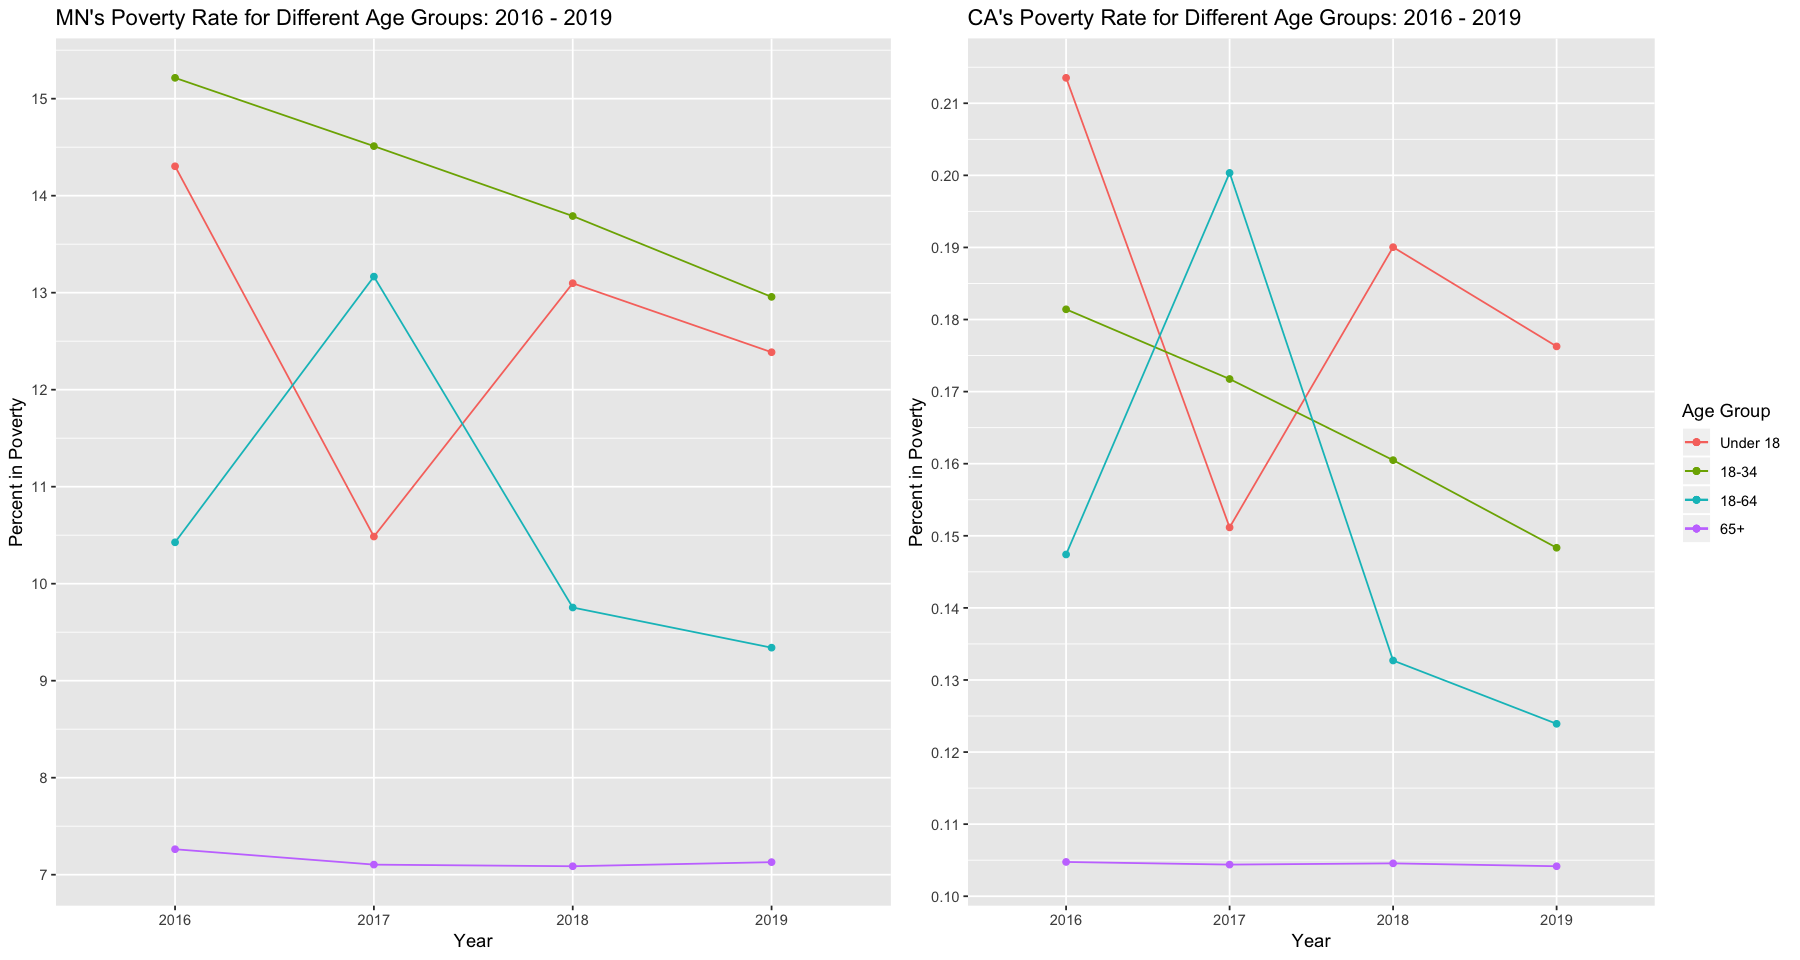

In [17]:
grid.arrange(p1,p2, ncol=2)

Section $6$, we observe the level of poverty from $2016$ to $2019$ for each age group. In this section, we applied OpenIntro’s dataset to extract ages under $5$, under $18$, ages between $18$ to $64$, and ages $65$ and older. The variables had to be amended because the age group under $18$ and ages between $18$ to $64$  were split into different variables in the data set. Additionally, we had to scale the percentage to correctly match the population size. Hence, in the above graphs, we employed both the U.S Consensus and OpenIntro to complete our analysis. The percentages were taken from OpenIntro and the correct population was used from the U.S. Consensus.  Having both datasets we managed to scale the percentage according to each state's population size. 

Intriguingly enough, age’s $18$ and under have the highest percentage of poverty for California, and age’s $16$ to $34$ were the highest in Minnesota for $2016$. Notice for the following year both California and Minnesota’s underage poverty decreased significantly. Contrarily, the rate for ages $18$ to $64$ notably increased in CA and MN. That is interesting since the poverty rate for ages $18$ to $34$ consistently decreased for both states. Overall, we notice that the poverty rate is at a decreasing trend from 2016 to 2019 except for the ages $65$ and older. In both plots, CA’s and MN’s poverty rates for ages $65$ and older are relatively low, especially CA’s with a low of $0.105$. 

### Different Ethnicities in poverty for 2016, 17, 18, 19 ###

In [19]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
race16 = select(ca_demo2016, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race17 = select(ca_demo2017, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race18 = select(ca_demo2018, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race19 = select(ca_demo2019, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')


scale_race16 = (race16*ca$pop2016)
scale_race17 = (race17*ca$pop2017)
scale_race18 = (race18*ca_demo2018$pop2018)
scale_race19 = (race19*ca$pop_2019)

r1 = c(sum(scale_race16$white_alone)/total_16, 
       sum(scale_race17$white_alone)/total_17,
       sum(scale_race18$white_alone)/total_18,
       sum(scale_race19$white_alone)/total_19)

r2 = c(sum(scale_race16$black_or_african_american)/total_16, 
       sum(scale_race17$black_or_african_american)/total_17, 
       sum(scale_race18$black_or_african_american)/total_18, 
       sum(scale_race19$black_or_african_american)/total_19)

r3 = c(sum(scale_race16$american_indian_and_alaska_native)/total_16,
       sum(scale_race17$american_indian_and_alaska_native)/total_17,
       sum(scale_race18$american_indian_and_alaska_native)/total_18, 
       sum(scale_race19$american_indian_and_alaska_native)/total_19)

r4 = c(sum(scale_race16$asian)/total_16,
       sum(scale_race17$asian)/total_17,
       sum(scale_race18$asian)/total_18, 
       sum(scale_race19$asian)/total_19)

r5 = c(sum(scale_race16$native_hawaiian_pacific_islander)/total_16,
       sum(scale_race17$native_hawaiian_pacific_islander)/total_17,
       sum(scale_race18$native_hawaiian_pacific_islander)/total_18, 
       sum(scale_race19$native_hawaiian_pacific_islander)/total_19)

r6 = c(sum(scale_race16$hispanic_or_latino_origin)/total_16,
       sum(scale_race17$hispanic_or_latino_origin)/total_17,
       sum(scale_race18$hispanic_or_latino_origin)/total_18, 
       sum(scale_race19$hispanic_or_latino_origin)/total_19); 

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df2 = data.frame(Year, r1, r2, r3, r4, r5, r6)



p3 <- ggplot(data = df2, aes(x = Year)) +
        # "MN's Poverty Rate Race: White"
        geom_point(aes(y = r1*100, color = "r1", group = 1)) +
        geom_line(aes(y = r1*100, color = "r1", group = 1)) +

        # "MN's Poverty Rate Race: Black or African and American"
        geom_point(aes(y = r2*100, color = "r2", group = 1)) +
        geom_line(aes(y = r2*100, color = "r2", group = 1)) +

        # "MN's Poverty Rate Race: American Indian and Alaska Native"
        geom_point(aes(y = r3*100, color = "r3", group = 1)) +
        geom_line(aes(y = r3*100, color = "r3", group = 1)) +
    
        # "MN's Poverty Rate Race: Asian"
        geom_point(aes(y = r4*100, color = "r4", group = 1)) +
        geom_line(aes(y = r4*100, color = "r4", group = 1)) +
        
        # "MN's Poverty Rate Race: Native Hawaiian Pacific Islander"
        geom_point(aes(y = r5*100, color = "r5", group = 1)) +
        geom_line(aes(y = r5*100, color = "r5", group = 1)) +
        
        # "MN's Poverty Rate Race: Hispanic or Latino"
        geom_point(aes(y = r6*100, color = "r6", group = 1)) +
        geom_line(aes(y = r6*100, color = "r6", group = 1)) +
        scale_colour_discrete(name  = "Race/Ethnicity",
                            breaks=c("r1", "r2", "r3", "r4", "r5", "r6"),
                            labels=c("White", "Black/African & American", 
                                     "American Indian and Alaska Native", "Asian", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("CA's Poverty Rate for Different Race/Ethnicities: 2016 - 2019")


In [20]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
race16 = select(mdemo16, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race17 = select(mdemo17, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race18 = select(mdemo18, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race19 = select(mdemo19, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')


scale_race16 = (race16*minn_poverty$pop2016)
scale_race17 = (race17*minn_poverty$pop2017)
scale_race18 = (race18*mdemo18$pop2018)
scale_race19 = (race19*minn_poverty$pop_2019)

r1 = c(sum(scale_race16$white_alone)/total_pop16, 
       sum(scale_race17$white_alone)/total_pop17,
       sum(scale_race18$white_alone)/total_pop18,
       sum(scale_race19$white_alone)/total_pop19)

r2 = c(sum(scale_race16$black_or_african_american)/total_pop16, 
       sum(scale_race17$black_or_african_american)/total_pop17, 
       sum(scale_race18$black_or_african_american)/total_pop18, 
       sum(scale_race19$black_or_african_american)/total_pop19)

r3 = c(sum(scale_race16$american_indian_and_alaska_native)/total_pop16,
       sum(scale_race17$american_indian_and_alaska_native)/total_pop17,
       sum(scale_race18$american_indian_and_alaska_native)/total_pop18, 
       sum(scale_race19$american_indian_and_alaska_native)/total_pop19)

r4 = c(sum(scale_race16$asian)/total_pop16,
       sum(scale_race17$asian)/total_pop17,
       sum(scale_race18$asian)/total_pop18, 
       sum(scale_race19$asian)/total_pop19)

r5 = c(sum(scale_race16$native_hawaiian_pacific_islander)/total_pop16,
       sum(scale_race17$native_hawaiian_pacific_islander)/total_pop17,
       sum(scale_race18$native_hawaiian_pacific_islander)/total_pop18, 
       sum(scale_race19$native_hawaiian_pacific_islander)/total_pop19)

r6 = c(sum(scale_race16$hispanic_or_latino_origin)/total_pop16,
       sum(scale_race17$hispanic_or_latino_origin)/total_pop17,
       sum(scale_race18$hispanic_or_latino_origin)/total_pop18, 
       sum(scale_race19$hispanic_or_latino_origin)/total_pop19)
# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df2 = data.frame(Year, r1, r2, r3, r4, r5, r6)



p2 <- ggplot(data = df2, aes(x = Year)) +
        # "MN's Poverty Rate Race: White"
        geom_point(aes(y = r1*100, color = "r1", group = 1)) +
        geom_line(aes(y = r1*100, color = "r1", group = 1)) +

        # "MN's Poverty Rate Race: Black or African and American"
        geom_point(aes(y = r2*100, color = "r2", group = 1)) +
        geom_line(aes(y = r2*100, color = "r2", group = 1)) +

        # "MN's Poverty Rate Race: American Indian and Alaska Native"
        geom_point(aes(y = r3*100, color = "r3", group = 1)) +
        geom_line(aes(y = r3*100, color = "r3", group = 1)) +
    
        # "MN's Poverty Rate Race: Asian"
        geom_point(aes(y = r4*100, color = "r4", group = 1)) +
        geom_line(aes(y = r4*100, color = "r4", group = 1)) +
        
        # "MN's Poverty Rate Race: Native Hawaiian Pacific Islander"
        geom_point(aes(y = r5*100, color = "r5", group = 1)) +
        geom_line(aes(y = r5*100, color = "r5", group = 1)) +
        
        # "MN's Poverty Rate Race: Hispanic or Latino"
        geom_point(aes(y = r6*100, color = "r6", group = 1)) +
        geom_line(aes(y = r6*100, color = "r6", group = 1)) +
        theme(legend.position = "none") + 
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Poverty Rate for Different Race/Ethnicities: 2016 - 2019")


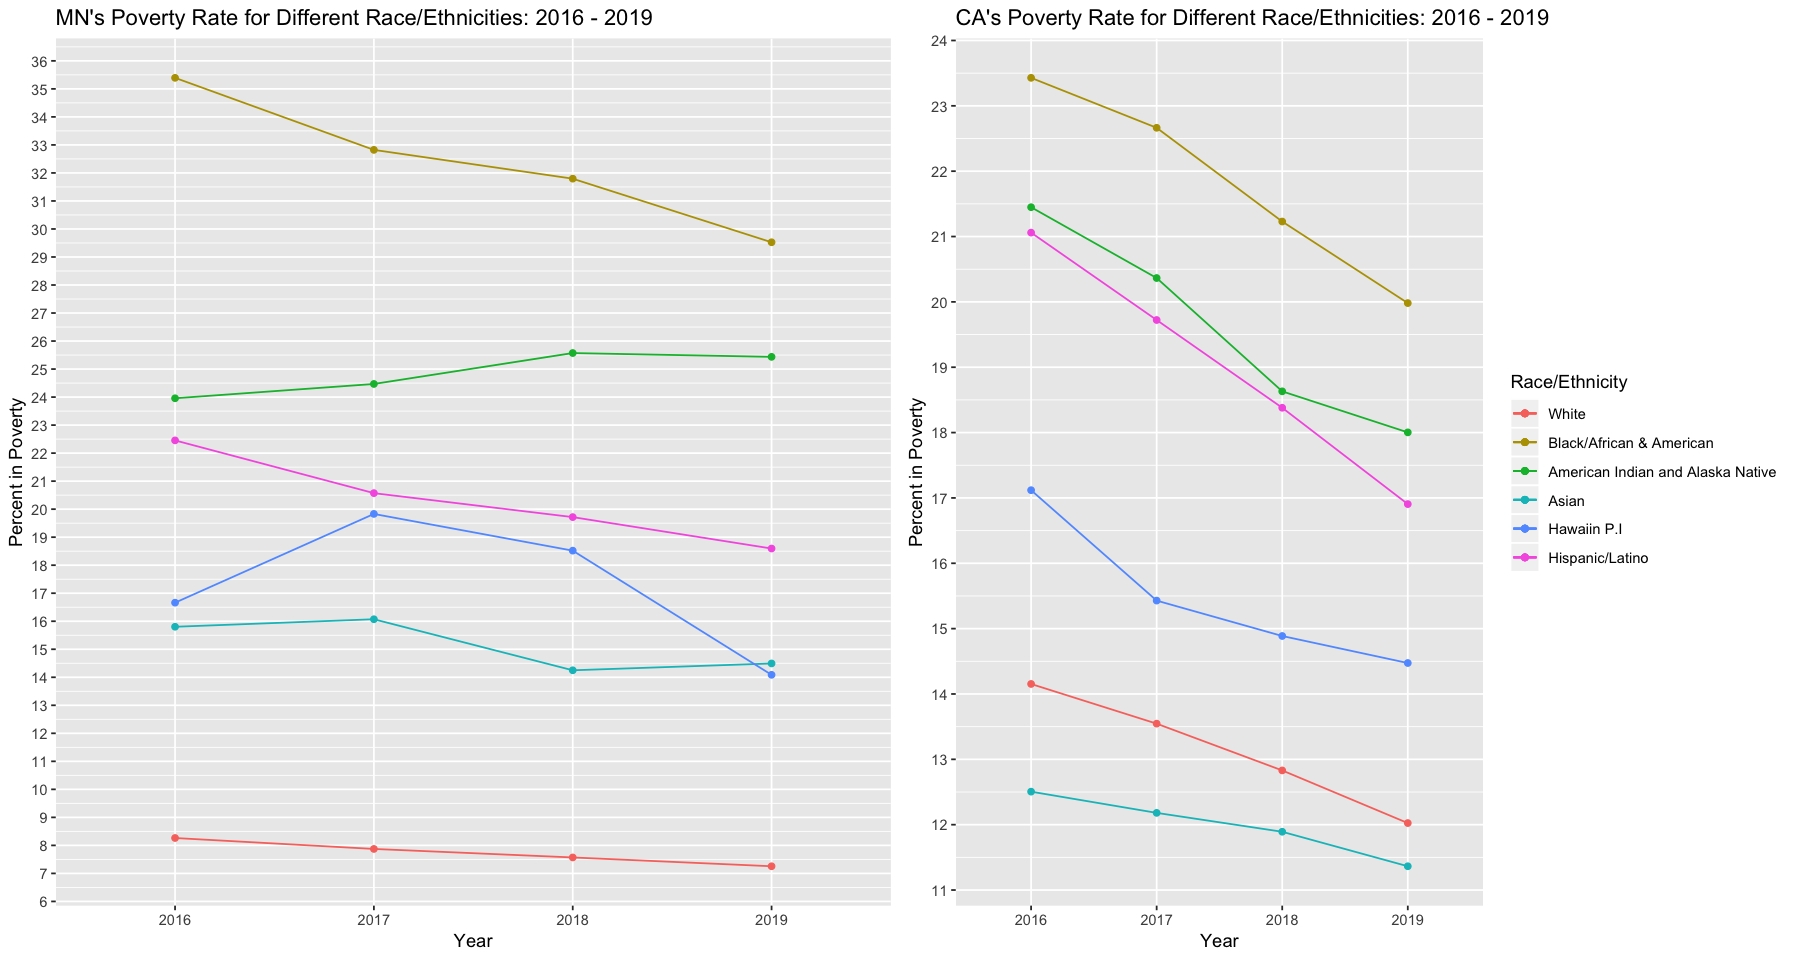

In [21]:
grid.arrange(p2,p3, ncol=2)

Section $7$ plots the different races/ethnicities under poverty. Similar to the previous graph, to plot and analyze this graph we used both datasets to complete our analysis. We looked at White, Black, American Indian/Alaskan Native, Pacific Islander, and Latinos with their correlating poverty rate. Similarly to Section $6$, we scaled their percentages according to each culture's population size for CA and MN. We made sure to sum all values for each race’s poverty rate and divide the sum by the total population to its agreed state. 

Dismally, Blacks had the highest poverty rate with MN’s at a high of $34\%$ in $2016$. Unfortunately, it was a stat we expected since so much research and statistics is done to aid and provide poor black communities. A shocking result was Asian’s are the least poor out of all groups throughout the whole measured time period in CA. We honestly conjectured that Whites would have the lowest poverty rate, especially in CA. MN’s had a singular trend flip as the poverty rate for Asians increased to be above the poverty rate for Pacific Islanders in $2019$. Overall, CA’s poverty rate decreased for all ethnic groups and most of MN’s ethnic groups decreased except American Indian/Alaska Native. 


### Poverty level compared to the highest level of education in 2016, 17, 18, 19 ###

In [22]:
education16 = select(demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*minn_poverty$pop2016)
scale_edu17 = (education17*minn_poverty$pop2017)
scale_edu18 = (education18*mdemo18$pop2018)
scale_edu19 = (education19*minn_poverty$pop_2019)

e1 = c(sum(scale_edu16$less_than_hs_graduate)/total_pop16, 
       sum(scale_edu17$less_than_hs_graduate)/total_pop17,
       sum(scale_edu18$less_than_hs_graduate)/total_pop18,
       sum(scale_edu19$less_than_hs_graduate)/total_pop19)

e2 = c(sum(scale_edu16$hs_graduate)/total_pop16, 
       sum(scale_edu17$hs_graduate)/total_pop17, 
       sum(scale_edu18$hs_graduate)/total_pop18, 
       sum(scale_edu19$hs_graduate)/total_pop19)

e3 = c(sum(scale_edu16$some_college_or_associate)/total_pop16,
       sum(scale_edu17$some_college_or_associate)/total_pop17,
       sum(scale_edu18$some_college_or_associate)/total_pop18, 
       sum(scale_edu19$some_college_or_associate)/total_pop19)

e4 = c(sum(scale_edu16$bachelor_or_higher)/total_pop16,
       sum(scale_edu17$bachelor_or_higher)/total_pop17,
       sum(scale_edu18$bachelor_or_higher)/total_pop18, 
       sum(scale_edu19$bachelor_or_higher)/total_pop19)

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df3 = data.frame(Year, e1, e2, e3, e4)



p3 <- ggplot(data = df3, aes(x = Year)) +
        # "MN's Poverty Rate Education Level: Less Than Highschool"
        geom_histogram(aes(y = e1*100, fill = "e1"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Highschool Graduate"
        geom_histogram(aes(y = e2*100, fill = "e2"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Some College or Associate"
        geom_histogram(aes(y = e3*100, fill = "e3"), color = "grey44", stat = 'identity') +
    
        # "MN's Poverty Rate Educaton Level: Bachelor's or Higher"
        geom_histogram(aes(y = e4*100, fill = "e4"), color = "grey44", stat = 'identity') +
        
        theme(legend.position = "none") +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Histogram on Poverty with the Highest Level of Education: 2016 - 2019")


In [23]:
#California's 
education16 = select(ca_demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(ca_demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(ca_demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(ca_demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*ca$pop2016)
scale_edu17 = (education17*ca$pop2017)
scale_edu18 = (education18*ca_demo2018$pop2018)
scale_edu19 = (education19*ca$pop_2019)

education16 = select(ca_demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(ca_demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(ca_demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(ca_demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*ca$pop2016)
scale_edu17 = (education17*ca$pop2017)
scale_edu18 = (education18*ca_demo2018$pop2018)
scale_edu19 = (education19*ca$pop_2019)

e1 = c(sum(scale_edu16$less_than_hs_graduate)/total_16, 
       sum(scale_edu17$less_than_hs_graduate)/total_17,
       sum(scale_edu18$less_than_hs_graduate)/total_18,
       sum(scale_edu19$less_than_hs_graduate)/total_19)

e2 = c(sum(scale_edu16$hs_graduate)/total_16, 
       sum(scale_edu17$hs_graduate)/total_17, 
       sum(scale_edu18$hs_graduate)/total_18, 
       sum(scale_edu19$hs_graduate)/total_19)

e3 = c(sum(scale_edu16$some_college_or_associate)/total_16,
       sum(scale_edu17$some_college_or_associate)/total_17,
       sum(scale_edu18$some_college_or_associate)/total_18, 
       sum(scale_edu19$some_college_or_associate)/total_19)

e4 = c(sum(scale_edu16$bachelor_or_higher)/total_16,
       sum(scale_edu17$bachelor_or_higher)/total_17,
       sum(scale_edu18$bachelor_or_higher)/total_18, 
       sum(scale_edu19$bachelor_or_higher)/total_19)

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df3 = data.frame(Year, e1, e2, e3, e4)



p4 <- ggplot(data = df3, aes(x = Year)) +
        # "MN's Poverty Rate Education Level: Less Than Highschool"
        geom_histogram(aes(y = e1*100, fill = "e1"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Highschool Graduate"
        geom_histogram(aes(y = e2*100, fill = "e2"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Some College or Associate"
        geom_histogram(aes(y = e3*100, fill = "e3"), color = "grey44", stat = 'identity') +
    
        # "MN's Poverty Rate Educaton Level: Bachelor's or Higher"
        geom_histogram(aes(y = e4*100, fill = "e4"), color = "grey44", stat = 'identity') +

        scale_fill_discrete(name  = "Level of Education",
                            breaks=c("e1", "e2", "e3", "e4", "e5", "e6"),
                            labels=c("Less Than High school", "High school Graduate", 
                                     "Some College or Associate", "Bachelor's or Higher", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("CA's Histogram on Poverty with the Highest Level of Education: 2016 - 2019")

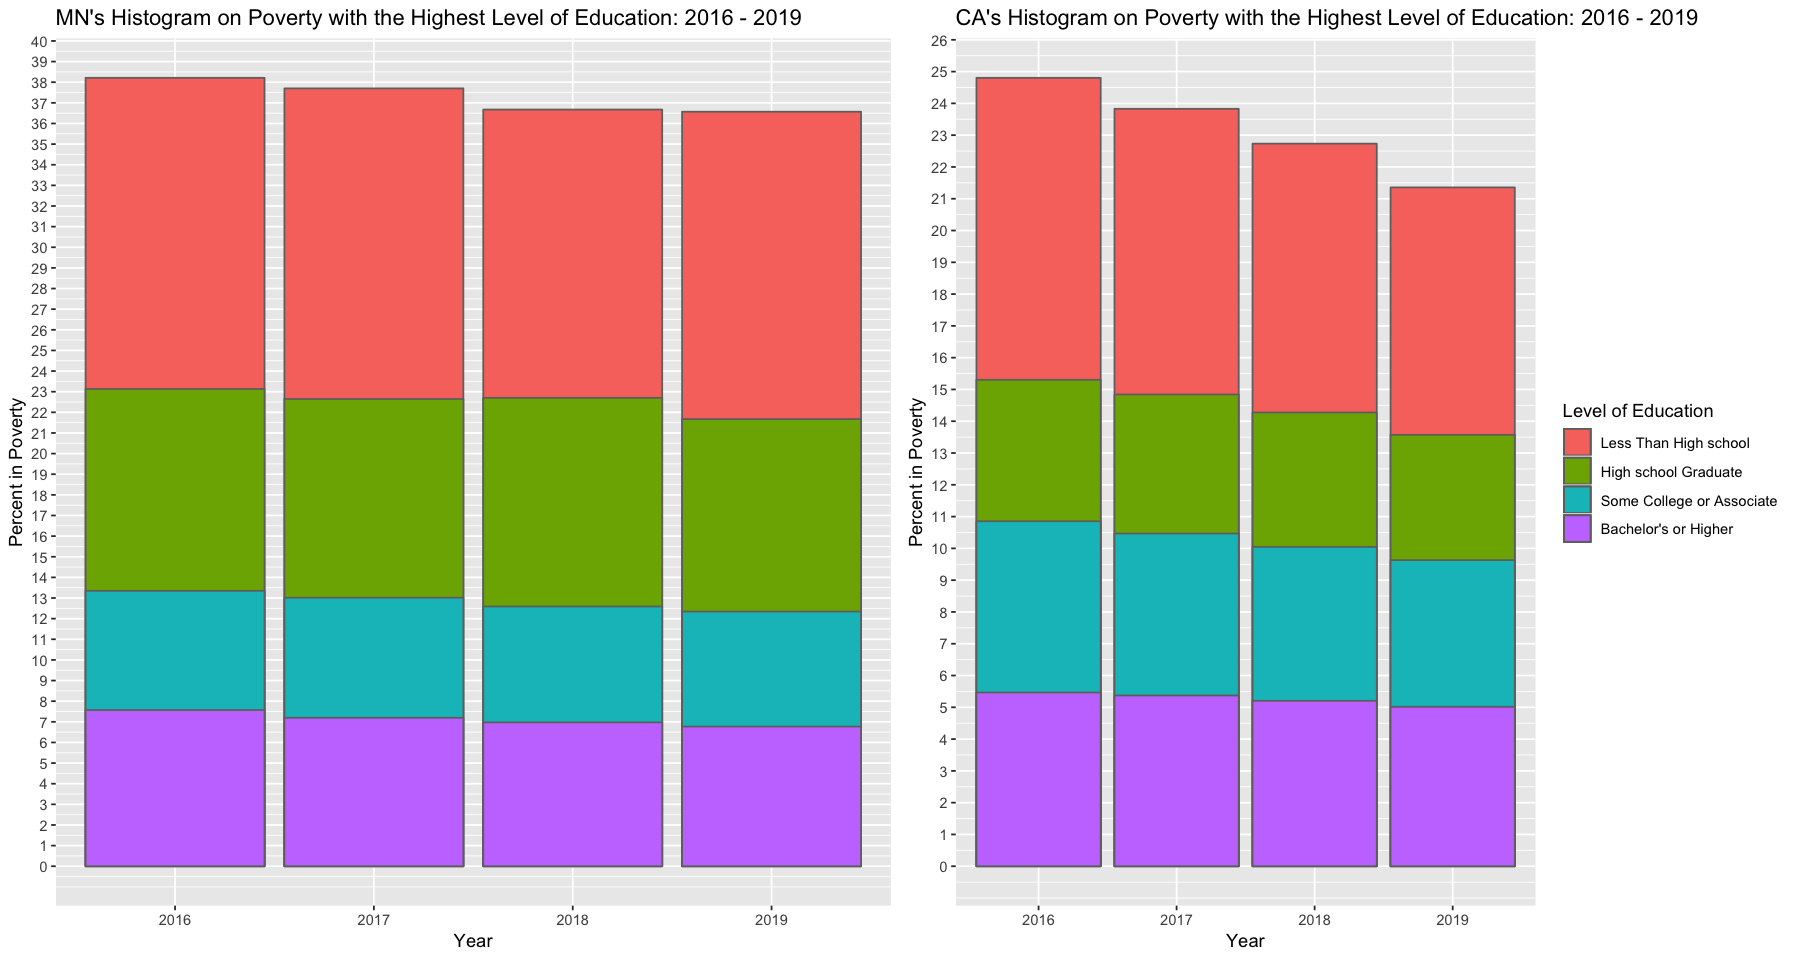

In [24]:
grid.arrange(p3,p4,ncol=2)

We often hear that education plays a significant role in an individual’s income, which leads to our interest in looking at the percentage of people living in poverty with the highest level of education from 2016 to 2019. Moreover, we grouped the educational attainment by individuals that didn’t complete high school, completed high school, some college or obtained an associate’s degree, and have obtained a bachelor’s degree or higher. 

For both states, there is a noticeable trend in both states that the lower the education level the higher the poverty rate. Overall, California has much lower poverty rates based on education levels when compared to Minnesota over the years. We were surprised by this fact since California’s population is much higher, so we assumed before that Minnesota would have a lower poverty rate regarding education levels.

# Conclusion #

After analyzing our selected data, examining the median household income in $2019$, the percentage of poverty rate for each county in $2019$,  the poverty for underage individuals, the different age groups in poverty, the ethnic groups that are needful, and the percentage of poverty compared to education level, we want to say that there is a decreasing trend in poverty, however, we do not have enough evidence to support that. If we were to solely focus on our data then our concluding statement is that the poverty rate had a decreasing trend from $2016$ to $2019$. We learned that the U.S Consensus determined poverty from each age group differently, specifically, underage children, we noticed that from $2016$ to $2019$ there was a downwarding trend in ages and ethnicities living in poverty, and people with higher education have less poverty rate. 

In the future, we would like to extend our research by considering more time periods such as $2010$ to $2015$ or more recent times as in $2020$ and $2021$. We would also like to extend this research during the pandemic and investigate what affects did COVID-19 has in poor communities. We think it would be imperative to know if the poverty rate increased and if so by what proportion or if the poverty rate decreased? Other thoughts are comparing the different poverty levels from the 2010s to the 1990s; if we have improved in decreasing the poverty rate. This research not only showed us how to utilize our statistical analysis, but, confirm our unsettled knowledge. 